In [4]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

In [5]:
TRAIN_DIRECTORY = 'images/train'
TEST_DIRECTORY = 'images/test'

In [6]:
def createdf(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [7]:
train = pd.DataFrame()
train['image'],train['label'] = createdf(TRAIN_DIRECTORY)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'],test['label'] = createdf(TEST_DIRECTORY)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [11]:
from tqdm.notebook import tqdm
from keras_preprocessing.image import load_img

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [13]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [14]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [16]:
x_train = train_features/255.0
x_test = test_features/255.0

In [18]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.0 MB 19.8 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 18.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 18.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   --- ------------------------------------ 3.7/44.8 MB 18.1 MB/s eta 0:00:03
   ------ --------------------------------- 7.6/44.8 MB 18.8 MB/s eta 0:00:02
   ---------- ----------------------------- 11.5/44.8 MB 19.0 MB/s eta 0:00:02
   ------------- -------------------------- 15.2/44.8 MB 18.7 MB/s eta 0:00:02
   ----------------- ---------------------- 19.4/44.8 MB 18.8 MB/s eta 0:00:02
   -------------------- ------------------- 23.1/44.8 MB 19.0 MB/s eta 0:00:02
   ------------------------ --------------- 27.0/44.8 MB 18.8 MB/s eta 0:00:01
   --------------------------- ------------ 30.7/44.8 MB 18.5 MB/s eta 0:0

In [19]:
from sklearn.preprocessing import LabelEncoder


In [20]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [22]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [23]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [27]:
model = Sequential()
#cnn layers(convolutional layers)
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
#fully connected layers
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(7,activation='softmax'))

In [29]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [30]:
model.fit(x=x_train, y=y_train,batch_size=128,epochs = 100,validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 183s 798ms/step - accuracy: 0.2382 - loss: 1.8346 - val_accuracy: 0.2583 - val_loss: 1.8166
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 166s 734ms/step - accuracy: 0.2438 - loss: 1.8119 - val_accuracy: 0.2840 - val_loss: 1.7276
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 167s 737ms/step - accuracy: 0.2882 - loss: 1.7232 - val_accuracy: 0.3552 - val_loss: 1.6124
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 164s 725ms/step - accuracy: 0.3579 - loss: 1.6061 - val_accuracy: 0.4441 - val_loss: 1.4427
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 164s 728ms/step - accuracy: 0.4051 - loss: 1.5222 - val_accuracy: 0.4769 - val_loss: 1.3630
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 164s 725ms/step - accuracy: 0.4375 - loss: 1.4559 - val_accuracy: 0.4929 - val_loss: 1.3207
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 172s 760ms/step - accuracy: 0.4594 - loss: 1.3990 - val_accuracy: 0.5136 - val_loss: 1.2838
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 167s 739ms/step - accuracy: 

In [48]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [49]:
from keras.models import model_from_json

In [50]:
json_file = open("emotiondetector.json","r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [51]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [52]:
def extract_function(image):
    img = load_img(image,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [53]:
image = 'images/train/happy/14.jpg'
print("original image is happy")
img = extract_function(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
model prediction is  happy


In [54]:
image = 'images\\train\\disgust\\758.jpg'
print("original image is disgust")
img = extract_function(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
model prediction is  disgust


In [55]:
!pip install matplotlib


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
model prediction is  happy


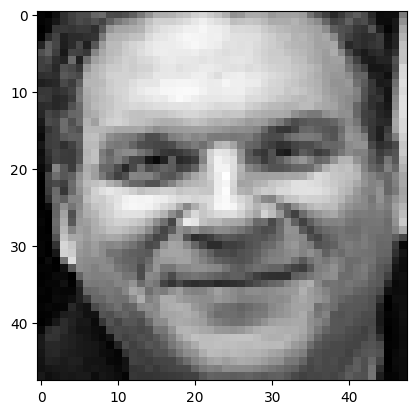

In [57]:
image = 'images/train/happy/14.jpg'
print("original image is happy")
img = extract_function(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')